<a href="https://colab.research.google.com/github/DataBioExplorer/Calculo_metricas/blob/main/matriz_de_confusao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

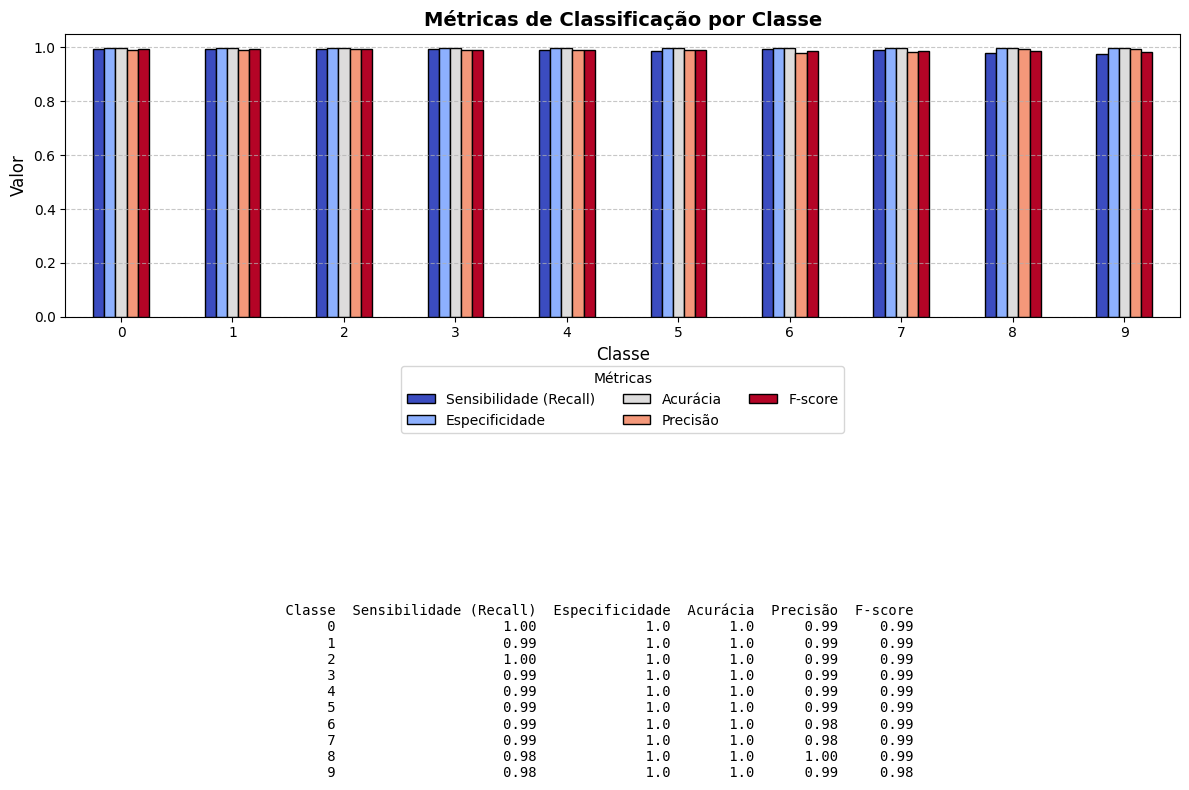

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Função para calcular métricas a partir da matriz de confusão
def calcular_metricas(confusion_matrix):
    VP = np.diag(confusion_matrix)  # Verdadeiros Positivos
    FN = np.sum(confusion_matrix, axis=1) - VP  # Falsos Negativos
    FP = np.sum(confusion_matrix, axis=0) - VP  # Falsos Positivos
    VN = np.sum(confusion_matrix) - (VP + FN + FP)  # Verdadeiros Negativos

    N = np.sum(confusion_matrix)  # Total de amostras

    # Cálculo das métricas com tratamento para divisão por zero
    sensibilidade = np.where((VP + FN) > 0, VP / (VP + FN), 0)
    especificidade = np.where((FP + VN) > 0, VN / (FP + VN), 0)
    acuracia = (VP + VN) / N
    precisao = np.where((VP + FP) > 0, VP / (VP + FP), 0)
    f_score = np.where((precisao + sensibilidade) > 0, 2 * (precisao * sensibilidade) / (precisao + sensibilidade), 0)

    # Criar um DataFrame para exibição organizada
    metricas_df = pd.DataFrame({
        "Classe": range(len(confusion_matrix)),
        "Sensibilidade (Recall)": sensibilidade,
        "Especificidade": especificidade,
        "Acurácia": acuracia,
        "Precisão": precisao,
        "F-score": f_score
    })

    return metricas_df

# Calcular as métricas para cada classe
metricas_df = calcular_metricas(com_mat)

# Criar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))
metricas_df.set_index("Classe").plot(kind="bar", ax=ax, colormap="coolwarm", edgecolor="black")

# Personalizar o gráfico
plt.title("Métricas de Classificação por Classe", fontsize=14, fontweight="bold")
plt.xlabel("Classe", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Posicionar a legenda abaixo do gráfico
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, title="Métricas", fontsize=10, loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)

# Exibir valores numéricos abaixo do gráfico
plt.figtext(0.5, -0.3, metricas_df.round(2).to_string(index=False), wrap=True, ha="center", fontsize=10, family="monospace")

# Ajustar layout para evitar corte da legenda
plt.tight_layout(rect=[0, 0.2, 1, 1])

# Exibir gráfico
plt.show()
